In [1]:
import pandas as pd
import ast

In [2]:
df = pd.read_csv("scholarly_all_pubs.csv")
df["bib"] = df["bib"].apply(lambda x: ast.literal_eval(x))

In [3]:
df

,bib,author_id,author,coauthor
0,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Albert Sawczyn
1,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Denis Janiak
2,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Łukasz Augustyniak
3,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Tomasz Kajdanowicz
4,{'title': 'Graph-level representations using e...,27,Jakub Binkowski,Albert Sawczyn
...,...,...,...,...
5470,{'title': 'Contrastive Learning for Multi-Labe...,2,Maciej Zięba,Maciej Zieba
5471,{'title': 'The proposal of service-oriented su...,2,Maciej Zięba,Maciej Zieba
5472,{'title': 'On-line Bayesian Context Change Det...,2,Maciej Zięba,Jakub M Tomczak
5473,{'title': 'Two-stage Writer Identification Usi...,2,Maciej Zięba,Maciej Zieba


In [4]:
df["title"] = df["bib"].apply(lambda d: d["title"])
df

,bib,author_id,author,coauthor,title
0,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Albert Sawczyn,Fact-checking: relevance assessment of referen...
1,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Denis Janiak,Fact-checking: relevance assessment of referen...
2,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Łukasz Augustyniak,Fact-checking: relevance assessment of referen...
3,{'title': 'Fact-checking: relevance assessment...,27,Jakub Binkowski,Tomasz Kajdanowicz,Fact-checking: relevance assessment of referen...
4,{'title': 'Graph-level representations using e...,27,Jakub Binkowski,Albert Sawczyn,Graph-level representations using ensemble-bas...
...,...,...,...,...,...
5470,{'title': 'Contrastive Learning for Multi-Labe...,2,Maciej Zięba,Maciej Zieba,Contrastive Learning for Multi-Label Classific...
5471,{'title': 'The proposal of service-oriented su...,2,Maciej Zięba,Maciej Zieba,The proposal of service-oriented support decis...
5472,{'title': 'On-line Bayesian Context Change Det...,2,Maciej Zięba,Jakub M Tomczak,On-line Bayesian Context Change Detection in W...
5473,{'title': 'Two-stage Writer Identification Usi...,2,Maciej Zięba,Maciej Zieba,Two-stage Writer Identification Using Complex ...


In [5]:
title_words = (
    df[["author", "title"]]
    .groupby("author")["title"]
    .apply(lambda x: "#".join(x))
    .reset_index()
)
title_words

,author,title
0,Albert Sawczyn,Fact-checking: Relevance assessment of referen...
1,Arkadiusz Janz,plWordNet as a basis for large emotive lexicon...
2,Bartosz Perz,A system for collecting emotionally annotated ...
3,Denis Janiak,Fact-checking: Relevance assessment of referen...
4,Dominika Kunc,How to catch them all? enhanced data collectio...
5,Jakub Binkowski,Fact-checking: relevance assessment of referen...
6,Jan Kocoń,Beyond the imitation game: Quantifying and ext...
7,Jerzy Sas,Three-stage method of text region extraction f...
8,Joanna Baran,Neuro-symbolic models for sentiment analysis#N...
9,Kamil Kanclerz,Beyond the imitation game: Quantifying and ext...


In [8]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [9]:
title_words["words"] = title_words["title"].apply(lambda s: s.lower())
title_words["words"] = title_words["words"].apply(lambda s: word_tokenize(s))
title_words["words"] = title_words["words"].apply(
    lambda lst: [word for word in lst if word not in stop_words]
)
title_words["words"] = title_words["words"].apply(
    lambda lst: [word for word in lst if len(word) >= 3]
)
title_words

,author,title,words
0,Albert Sawczyn,Fact-checking: Relevance assessment of referen...,"[fact-checking, relevance, assessment, referen..."
1,Arkadiusz Janz,plWordNet as a basis for large emotive lexicon...,"[plwordnet, basis, large, emotive, lexicons, p..."
2,Bartosz Perz,A system for collecting emotionally annotated ...,"[system, collecting, emotionally, annotated, p..."
3,Denis Janiak,Fact-checking: Relevance assessment of referen...,"[fact-checking, relevance, assessment, referen..."
4,Dominika Kunc,How to catch them all? enhanced data collectio...,"[catch, enhanced, data, collection, emotion, r..."
5,Jakub Binkowski,Fact-checking: relevance assessment of referen...,"[fact-checking, relevance, assessment, referen..."
6,Jan Kocoń,Beyond the imitation game: Quantifying and ext...,"[beyond, imitation, game, quantifying, extrapo..."
7,Jerzy Sas,Three-stage method of text region extraction f...,"[three-stage, method, text, region, extraction..."
8,Joanna Baran,Neuro-symbolic models for sentiment analysis#N...,"[neuro-symbolic, models, sentiment, analysis, ..."
9,Kamil Kanclerz,Beyond the imitation game: Quantifying and ext...,"[beyond, imitation, game, quantifying, extrapo..."


In [10]:
stemmer = PorterStemmer()

title_words["stemmed_words"] = title_words["words"].apply(
    lambda lst: [stemmer.stem(word) for word in lst]
)
title_words

,author,title,words,stemmed_words
0,Albert Sawczyn,Fact-checking: Relevance assessment of referen...,"[fact-checking, relevance, assessment, referen...","[fact-check, relev, assess, refer, polish, pol..."
1,Arkadiusz Janz,plWordNet as a basis for large emotive lexicon...,"[plwordnet, basis, large, emotive, lexicons, p...","[plwordnet, basi, larg, emot, lexicon, polish,..."
2,Bartosz Perz,A system for collecting emotionally annotated ...,"[system, collecting, emotionally, annotated, p...","[system, collect, emot, annot, physiolog, sign..."
3,Denis Janiak,Fact-checking: Relevance assessment of referen...,"[fact-checking, relevance, assessment, referen...","[fact-check, relev, assess, refer, polish, pol..."
4,Dominika Kunc,How to catch them all? enhanced data collectio...,"[catch, enhanced, data, collection, emotion, r...","[catch, enhanc, data, collect, emot, recognit,..."
5,Jakub Binkowski,Fact-checking: relevance assessment of referen...,"[fact-checking, relevance, assessment, referen...","[fact-check, relev, assess, refer, polish, pol..."
6,Jan Kocoń,Beyond the imitation game: Quantifying and ext...,"[beyond, imitation, game, quantifying, extrapo...","[beyond, imit, game, quantifi, extrapol, capab..."
7,Jerzy Sas,Three-stage method of text region extraction f...,"[three-stage, method, text, region, extraction...","[three-stag, method, text, region, extract, di..."
8,Joanna Baran,Neuro-symbolic models for sentiment analysis#N...,"[neuro-symbolic, models, sentiment, analysis, ...","[neuro-symbol, model, sentiment, analysi, neur..."
9,Kamil Kanclerz,Beyond the imitation game: Quantifying and ext...,"[beyond, imitation, game, quantifying, extrapo...","[beyond, imit, game, quantifi, extrapol, capab..."


In [11]:
walk_red = [
    "Piotr Zieliński",
    "Martin Tabakov",
    "Halina Kwaśnicka",
    "Urszula Markowska-Kaczmar",
    "Jerzy Sas",
]

In [12]:
def flatten(l):
    return [item for sublist in l for item in sublist]


titles1 = set(
    flatten(
        [
            titles.split("#")
            for titles in title_words[title_words["author"].isin(walk_red)][
                "title"
            ].explode()
        ]
    )
)
titles1

{'3D robotic navigation using a vision-based deep reinforcement learning model',
 '4th International Symposium Advances in Artificial Intelligence and Applications',
 '8th International Symposium Advances in Artificial Intelligence and Applications',
 'A Language-Independent Method for Detection and Correction of Alignment Errors in Parallel Corpora',
 'A heuristic based on a hierarchical space model extracted from game replays',
 'A new reasoning approach combining information systems and interval type-2 fuzzy sets',
 'A new region growing medical image segmentation algorithm based on interval type-2 fuzzy sets',
 'A rule-based region growing fuzzy segmentation system for pathological brain computed tomography images',
 'APPLICATION OF DOCUMENT TYPE IDENTIFICATION IN MEDICAL HANDWRITTEN TEXTS RECOGNITION',
 'AUTOMATIC INDICATION OF HEAT LOSSES IN BUILDING THERMOGRAMS',
 'Adaptation of Automatic Information Extraction Method for Environmental Heatmaps to U-Matrices of Self Organising M

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

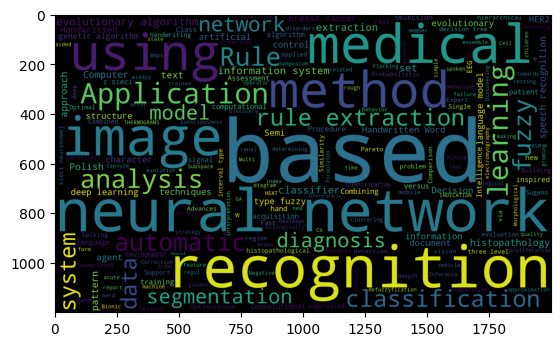

In [14]:
wc_red = WordCloud(width=2000, height=1200).generate(" ".join(titles1))
plt.imshow(wc_red)

In [15]:
plt.savefig("plots/walk_red_wc.svg", dpi=1200)

<Figure size 640x480 with 0 Axes>

In [16]:
walk_green = [
    "Maciej Zięba",
    "Piotr Bielak",
    "Jakub Binkowski",
    "Albert Sawczyn",
    "Denis Janiak",
    "Krzysztof Rajda",
    "Piotr Szymański",
    "Tomasz Kajdanowicz",
    "Rajmund Klemiński",
]

In [17]:
titles2 = set(
    [
        w.lower()
        for w in flatten(
            [
                titles.split("#")
                for titles in title_words[title_words["author"].isin(walk_green)][
                    "title"
                ].explode()
            ]
        )
    ]
)
titles2

{'a deeper look at graph embedding retrofitting',
 'a generic model for a multidimensional temporal social network',
 'a method for business sequential data prediction',
 'a method of label-dependent feature extraction in social networks',
 'a methodology for mining clinical data: experiences from transform project.',
 'a model for collaborative scheduling based on competencies',
 'a network perspective on stratification of multi-label data',
 'active learning and inference method for within network classification',
 'adversarial autoencoders for compact representations of 3d point clouds',
 'an approach to sentiment analysis of movie reviews: lexicon based vs. classification',
 'an assessment of node classification accuracy in social networks using label-dependent feature extraction',
 'analiza porównawcza wybranych technik eksploracji danych do klasyfikacji danych medycznych z brakującymi obserwacjami,[w:] k. jajuga, m. walesiak (red.), taksonomia 19',
 'analysis of direct citation, 

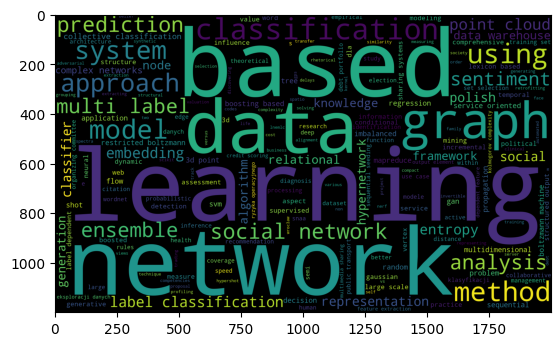

In [18]:
wc_green = WordCloud(width=2000, height=1200).generate(" ".join(titles2))
plt.imshow(wc_green)

In [19]:
plt.savefig("walk_green_wc.svg", dpi=1200)

<Figure size 640x480 with 0 Axes>

In [20]:
walk_yellow = [
    "Piotr Bródka",
    "Przemysław Kazienko",
    "Radosław Michalski",
    "Mateusz Nurek",
    "Bartosz Perz",
    "Stanisław Saganowski",
    "Dominika Kunc",
    "Katarzyna Jabłońska",
]

In [21]:
titles3 = set(
    [
        w.lower()
        for w in flatten(
            [
                titles.split("#")
                for titles in title_words[title_words["author"].isin(walk_yellow)][
                    "title"
                ].explode()
            ]
        )
    ]
)
titles3

{'5th international symposium advances in artificial intelligence and applications',
 'a degree centrality in multi-layered social network',
 'a dynamic vote-rank based approach for effective sequential initialization of information spreading processes within complex networks',
 'a generic model for a multidimensional temporal social network',
 'a method for business sequential data prediction',
 'a method for group extraction in complex social networks',
 'a method of label-dependent feature extraction in social networks',
 'a methodology for mining clinical data: experiences from transform project.',
 'a multilayer network dataset of interaction and influence spreading in a virtual world',
 'a performance of centrality calculation in social networks',
 'a picture is worth a thousand words: an empirical study on the influence of content visibility on diffusion processes within a virtual world',
 'a resource-aware method for parallel d2d data streaming',
 'a system for collecting emoti

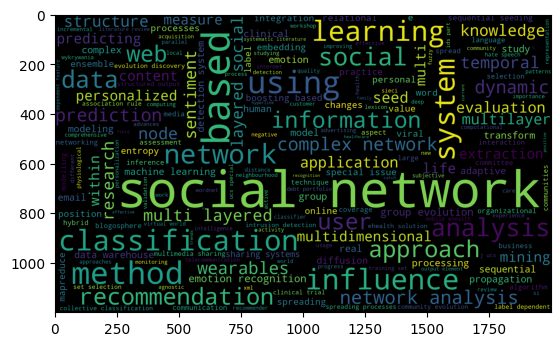

In [23]:
wc_yellow = WordCloud(width=2000, height=1200).generate(" ".join(titles3))
plt.imshow(wc_yellow)
plt.savefig("plots/walk_yellow_wc.svg", dpi=1200)

In [24]:
walk_blue = [
    "Stanisław Woźniak",
    "Wiktoria Walentynowicz",
    "Jan Kocoń",
    "Maciej Piasecki",
    "Arkadiusz Janz",
    "Joanna Baran",
    "Kamil Kanclerz",
]

In [25]:
titles4 = set(
    [
        w.lower()
        for w in flatten(
            [
                titles.split("#")
                for titles in title_words[title_words["author"].isin(walk_blue)][
                    "title"
                ].explode()
            ]
        )
    ]
)
titles4

{'1000 novels corpus',
 '24 novels',
 '3rd international workshop on advances in semantic information retrieval',
 'a (non)-perfect match: mapping plwordnet onto princetonwordnet',
 'a comparison of sense-level sentiment scores',
 'a large wordnet-based sentiment lexicon for polish',
 'a multi-level architecture for recognition of polish handwritten medical texts',
 'a preliminary noun phrase chunker for polish',
 'a procedural definition of multi-word lexical units',
 'a rule-based tagger for polish based on genetic algorithm',
 'a strategy of mapping polish wordnet onto princeton wordnet',
 'a unified sense inventory for word sense disambiguation in polish',
 'a weakly supervised word sense disambiguation for polish using rich lexical resources',
 'a wordnet from the ground up',
 'adaptive translation between user’s vocabulary and internet queries',
 'an abstract model for temporal composition of multimedia data',
 'an approach to rapid development of machine translation system for i

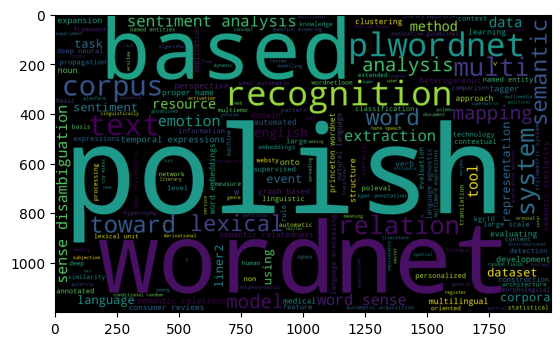

In [27]:
wc_blue = WordCloud(width=2000, height=1200).generate(" ".join(titles4))
plt.imshow(wc_blue)
plt.savefig("plots/walk_blue_wc.svg", dpi=1200)

In [28]:
walk_purple = ["Piotr Syga", "Piotr Kawa"]
titles5 = set(
    [
        w.lower()
        for w in flatten(
            [
                titles.split("#")
                for titles in title_words[title_words["author"].isin(walk_purple)][
                    "title"
                ].explode()
            ]
        )
    ]
)
titles5

{'a fully automated 3d in-vivo delineation and shape parameterization of the human lamina cribrosa in optical coherence tomography',
 'a note on deepfake detection with low-resources',
 'a novel automated approach for infrared-based assessment of meibomian gland morphology',
 'attack agnostic dataset: towards generalization and stabilization of audio deepfake detection',
 'automated image processing algorithm for infrared meibography',
 'automatic and objective assessment of meibomian glands structure and drop out',
 "blocker-type methods for protecting customers' privacy in rfid systems",
 'chameleon rfid and tracking prevention.',
 'defense against adversarial attacks on audio deepfake detection',
 'droppix: towards more realistic video fingerprinting',
 'emerging security challenges for ubiquitous devices',
 'enhancing privacy for ad hoc systems with predeployment key distribution',
 'fully automated detection of lamina cribrosa in optical coherence tomography: framework and illustr

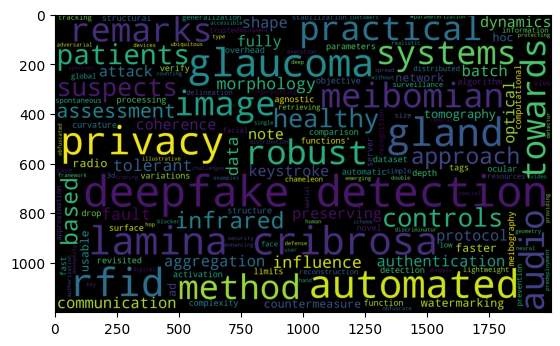

In [29]:
wc_purple = WordCloud(width=2000, height=1200).generate(" ".join(titles5))
plt.imshow(wc_purple)
plt.savefig("plots/walk_purple_wc.svg", dpi=1200)